In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
# CNN libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2023-10-30 15:18:48.729250: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
train_data = "../data/images/dermnet/train1"
test_data = "../data/images/dermnet/test1/"

In [3]:
# Preprocess
input_shape = (224, 224, 3) 
num_classes = 2

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_data,
        target_size=input_shape[:2],
        batch_size=32,
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        test_data,
        target_size=input_shape[:2],
        batch_size=32,
        class_mode='categorical')

Found 2075 images belonging to 2 classes.
Found 621 images belonging to 2 classes.


In [11]:
def build_model(input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

In [5]:
model = build_model(input_shape, num_classes)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
history = model.fit(
      train_generator,
      steps_per_epoch=50, 
      epochs=10,
      validation_data=validation_generator,
      validation_steps=25)
      

Epoch 1/10


2023-10-30 15:19:32.526473: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


50/50 [==============================] - ETA: 0s - loss: 0.8553 - accuracy: 0.6270

2023-10-30 15:20:44.242524: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


50/50 [==============================] - 86s 2s/step - loss: 0.8553 - accuracy: 0.6270 - val_loss: 0.5479 - val_accuracy: 0.7262
Epoch 2/10
50/50 [==============================] - 75s 1s/step - loss: 0.4960 - accuracy: 0.7492
Epoch 3/10
50/50 [==============================] - 76s 2s/step - loss: 0.4429 - accuracy: 0.7818
Epoch 4/10
50/50 [==============================] - 61s 1s/step - loss: 0.4056 - accuracy: 0.7981
Epoch 5/10
50/50 [==============================] - 66s 1s/step - loss: 0.3716 - accuracy: 0.8112
Epoch 6/10
50/50 [==============================] - 73s 1s/step - loss: 0.3262 - accuracy: 0.8339
Epoch 7/10
50/50 [==============================] - 95s 2s/step - loss: 0.2934 - accuracy: 0.8564
Epoch 8/10
50/50 [==============================] - 74s 1s/step - loss: 0.2498 - accuracy: 0.8869
Epoch 9/10
50/50 [==============================] - 81s 2s/step - loss: 0.2308 - accuracy: 0.8913
Epoch 10/10
50/50 [==============================] - 81s 2s/step - loss: 0.2041 - accur

In [7]:
test_loss, test_acc = model.evaluate(validation_generator, steps=25)
print('\nTest accuracy:', test_acc)

2023-10-30 15:32:30.617097: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


25/25 [==============================] - 11s 430ms/step - loss: 0.3997 - accuracy: 0.8390

Test accuracy: 0.8389694094657898


In [13]:
# Preprocess
input_shape = (224, 224, 3) 
num_classes = 4

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_data,
        target_size=input_shape[:2],
        batch_size=32,
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        test_data,
        target_size=input_shape[:2],
        batch_size=32,
        class_mode='categorical')

Found 2824 images belonging to 4 classes.
Found 809 images belonging to 4 classes.


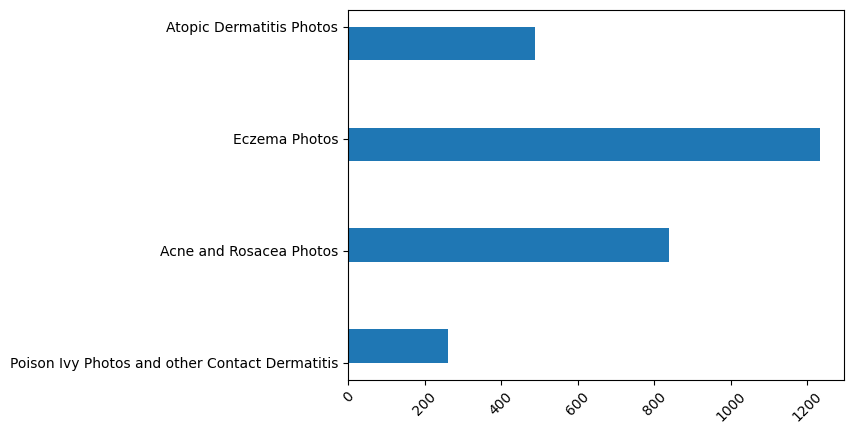

In [18]:
# Train Class distribution
train_image_paths = [os.path.join(root, file) 
               for root, dirs, files in os.walk("../data/images/dermnet/train1") 
               for file in files]

test_image_paths = [os.path.join(root, file) 
               for root, dirs, files in os.walk("../data/images/dermnet/test1") 
               for file in files]
classes = [os.path.basename(os.path.dirname(image_path)) for image_path in train_image_paths]
plt.hist(classes, orientation='horizontal')
plt.xticks(rotation=45)
plt.show()

In [14]:
def build_model(input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

In [15]:
model = build_model(input_shape, num_classes)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
history = model.fit(
      train_generator,
      steps_per_epoch=50, 
      epochs=10,
      validation_data=validation_generator,
      validation_steps=25)
      

Epoch 1/10


2023-10-30 15:35:15.855093: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


50/50 [==============================] - ETA: 0s - loss: 1.6265 - accuracy: 0.4400

2023-10-30 15:36:20.919322: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


50/50 [==============================] - 79s 2s/step - loss: 1.6265 - accuracy: 0.4400 - val_loss: 1.1454 - val_accuracy: 0.5412
Epoch 2/10
50/50 [==============================] - 84s 2s/step - loss: 1.1829 - accuracy: 0.5156 - val_loss: 1.1588 - val_accuracy: 0.5475
Epoch 3/10
50/50 [==============================] - 75s 1s/step - loss: 1.1133 - accuracy: 0.5462 - val_loss: 1.1366 - val_accuracy: 0.4988
Epoch 4/10
50/50 [==============================] - 75s 1s/step - loss: 1.0747 - accuracy: 0.5622 - val_loss: 1.1326 - val_accuracy: 0.5600
Epoch 5/10
50/50 [==============================] - 78s 2s/step - loss: 1.0220 - accuracy: 0.5844 - val_loss: 1.0629 - val_accuracy: 0.5813
Epoch 6/10
50/50 [==============================] - 76s 2s/step - loss: 0.9529 - accuracy: 0.6137 - val_loss: 1.0691 - val_accuracy: 0.5863
Epoch 7/10
50/50 [==============================] - 74s 1s/step - loss: 0.8810 - accuracy: 0.6562 - val_loss: 1.0365 - val_accuracy: 0.5913
Epoch 8/10
50/50 [=============

In [17]:
test_loss, test_acc = model.evaluate(validation_generator)
print('\nTest accuracy:', test_acc)

2023-10-30 16:54:20.949906: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


26/26 [==============================] - 9s 310ms/step - loss: 1.1859 - accuracy: 0.6255

Test accuracy: 0.6254635453224182
